# Warehouse Facility 05 - Warehouse key variables exploration
*This notebook illustrates how to assess the inventory position of a storage system.
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,FAKE,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH1,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH1,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH2,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH2,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,60.759906,8.929713
0,1,PRODOTTO_1,3.227903,0.741852
0,2,PRODOTTO_2,97.478611,4.827466
0,3,PRODOTTO_3,89.009382,6.000936
0,4,PRODOTTO_4,97.971271,4.868115


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,90,1,LOGICAL_WH2,AREA 1,1160,3,33,4,12000,26400,4800,54,54,3.231662,306.969703,7.406714,2020-01-02 00:34:39.774461,,OTHER
0,88,1,LOGICAL_WH2,AREA 1,1253,3,52,2,12000,41600,2400,701,701,10.634457,1045.077482,29.683177,2020-01-02 01:08:35.444616,+,PICKING
0,47,1,LOGICAL_WH1,AREA 1,1371,4,10,0,16000,8000,0,67,67,10.414674,880.109317,67.948833,2020-01-02 02:37:13.755818,+,PUTAWAY
0,49,1,FAKE,AREA 1,246,0,49,0,0,39200,0,319,319,21.946449,1774.627993,185.419559,2020-01-02 03:38:25.043690,+,PICKING
0,52,1,FAKE,AREA 1,1637,4,63,1,16000,50400,1200,557,557,15.453518,196.327421,132.860626,2020-01-02 03:47:00.692386,+,PUTAWAY


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH2,0,497,10.488944,2020-01-02
0,1,LOGICAL_WH1,1,684,19.772469,2020-01-02
0,1,LOGICAL_WH1,2,656,23.048022,2020-01-02
0,1,LOGICAL_WH2,3,1070,35.257489,2020-01-02
0,1,FAKE,4,1623,10.674244,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P8_warehouseAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Define a learning table for each picking list

In [9]:
# %% STUDY CORRELATIONS
path_current = os.path.join(path_results,f"Correlations")
os.makedirs(path_current, exist_ok=True)
from analogistics.supply_chain.P8_performance_assessment.wh_explore_metrics import buildLearningTablePickList

# extract learning table for each picking list
D_learning=buildLearningTablePickList(D_movements)
D_learning.to_excel(path_current+"\\learning table.xlsx")

In [10]:
#print the learning table
display(HTML(D_learning.head().to_html()))

,NODECODE,PICKINGLIST,INOUT,sum_QUANTITY,count_QUANTITY,TIMESEC_SPAN,RACK_SPAN,BAY_SPAN,LEVEL_SPAN,LOCCODEX_SPAN,LOCCODEY_SPAN
0,1,0,-,2.714491,1,0,0,0,0,0,0
1,1,1,+,12.865134,1,0,0,0,0,0,0
2,1,1,-,1.414221,1,0,0,0,0,0,0
3,1,2,,11.985834,1,0,0,0,0,0,0
4,1,2,-,6.693778,1,0,0,0,0,0,0


### Plot the histograms of the key variables

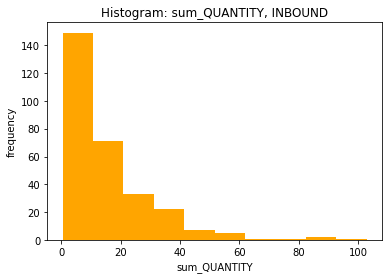

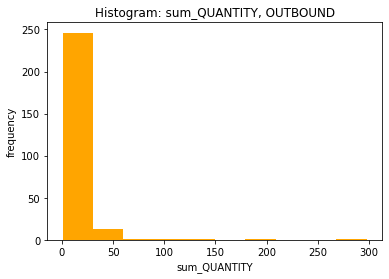

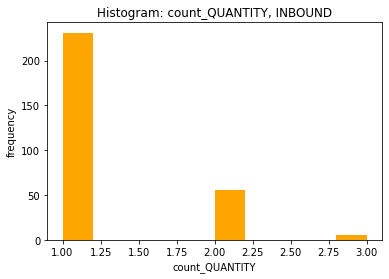

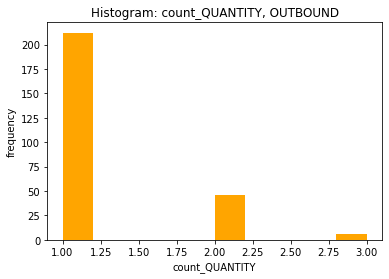

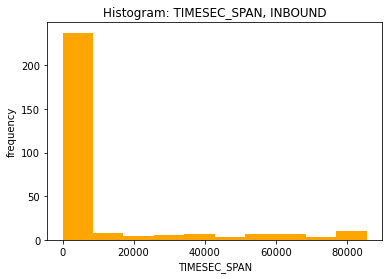

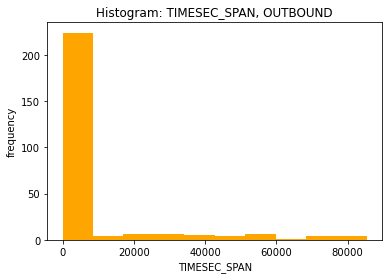

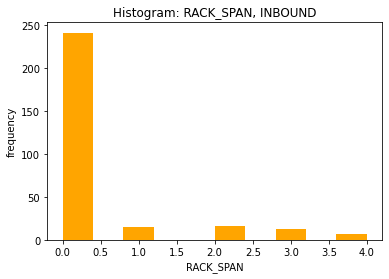

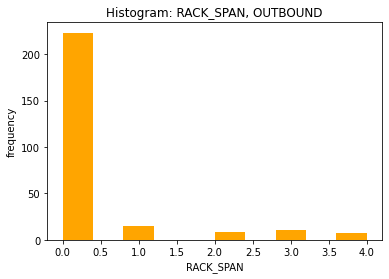

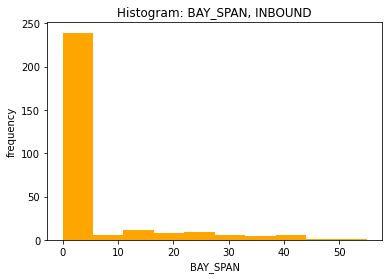

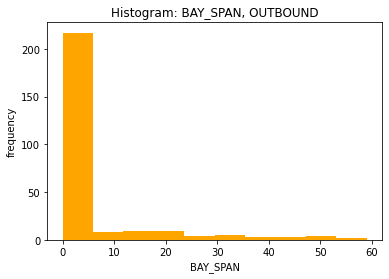

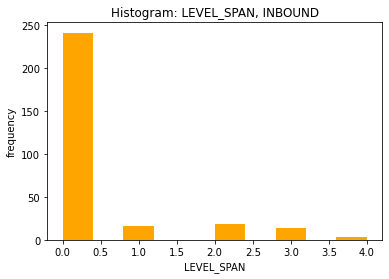

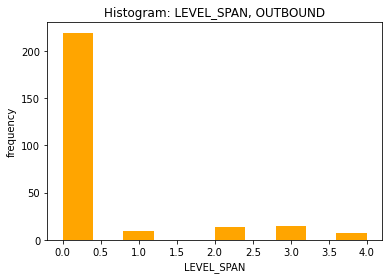

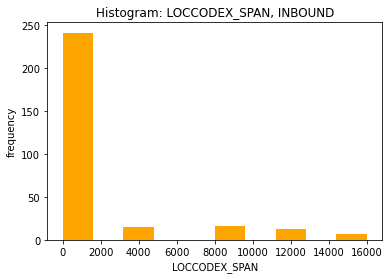

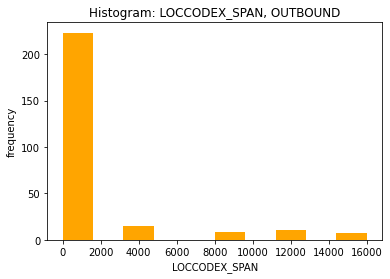

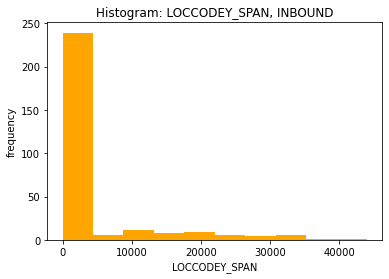

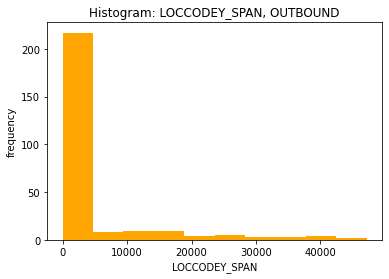

In [11]:
# %% histograms
from analogistics.supply_chain.P8_performance_assessment.wh_explore_metrics import histogramKeyVars
output_figures = histogramKeyVars(D_learning)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 

### Plot the correlation matrices

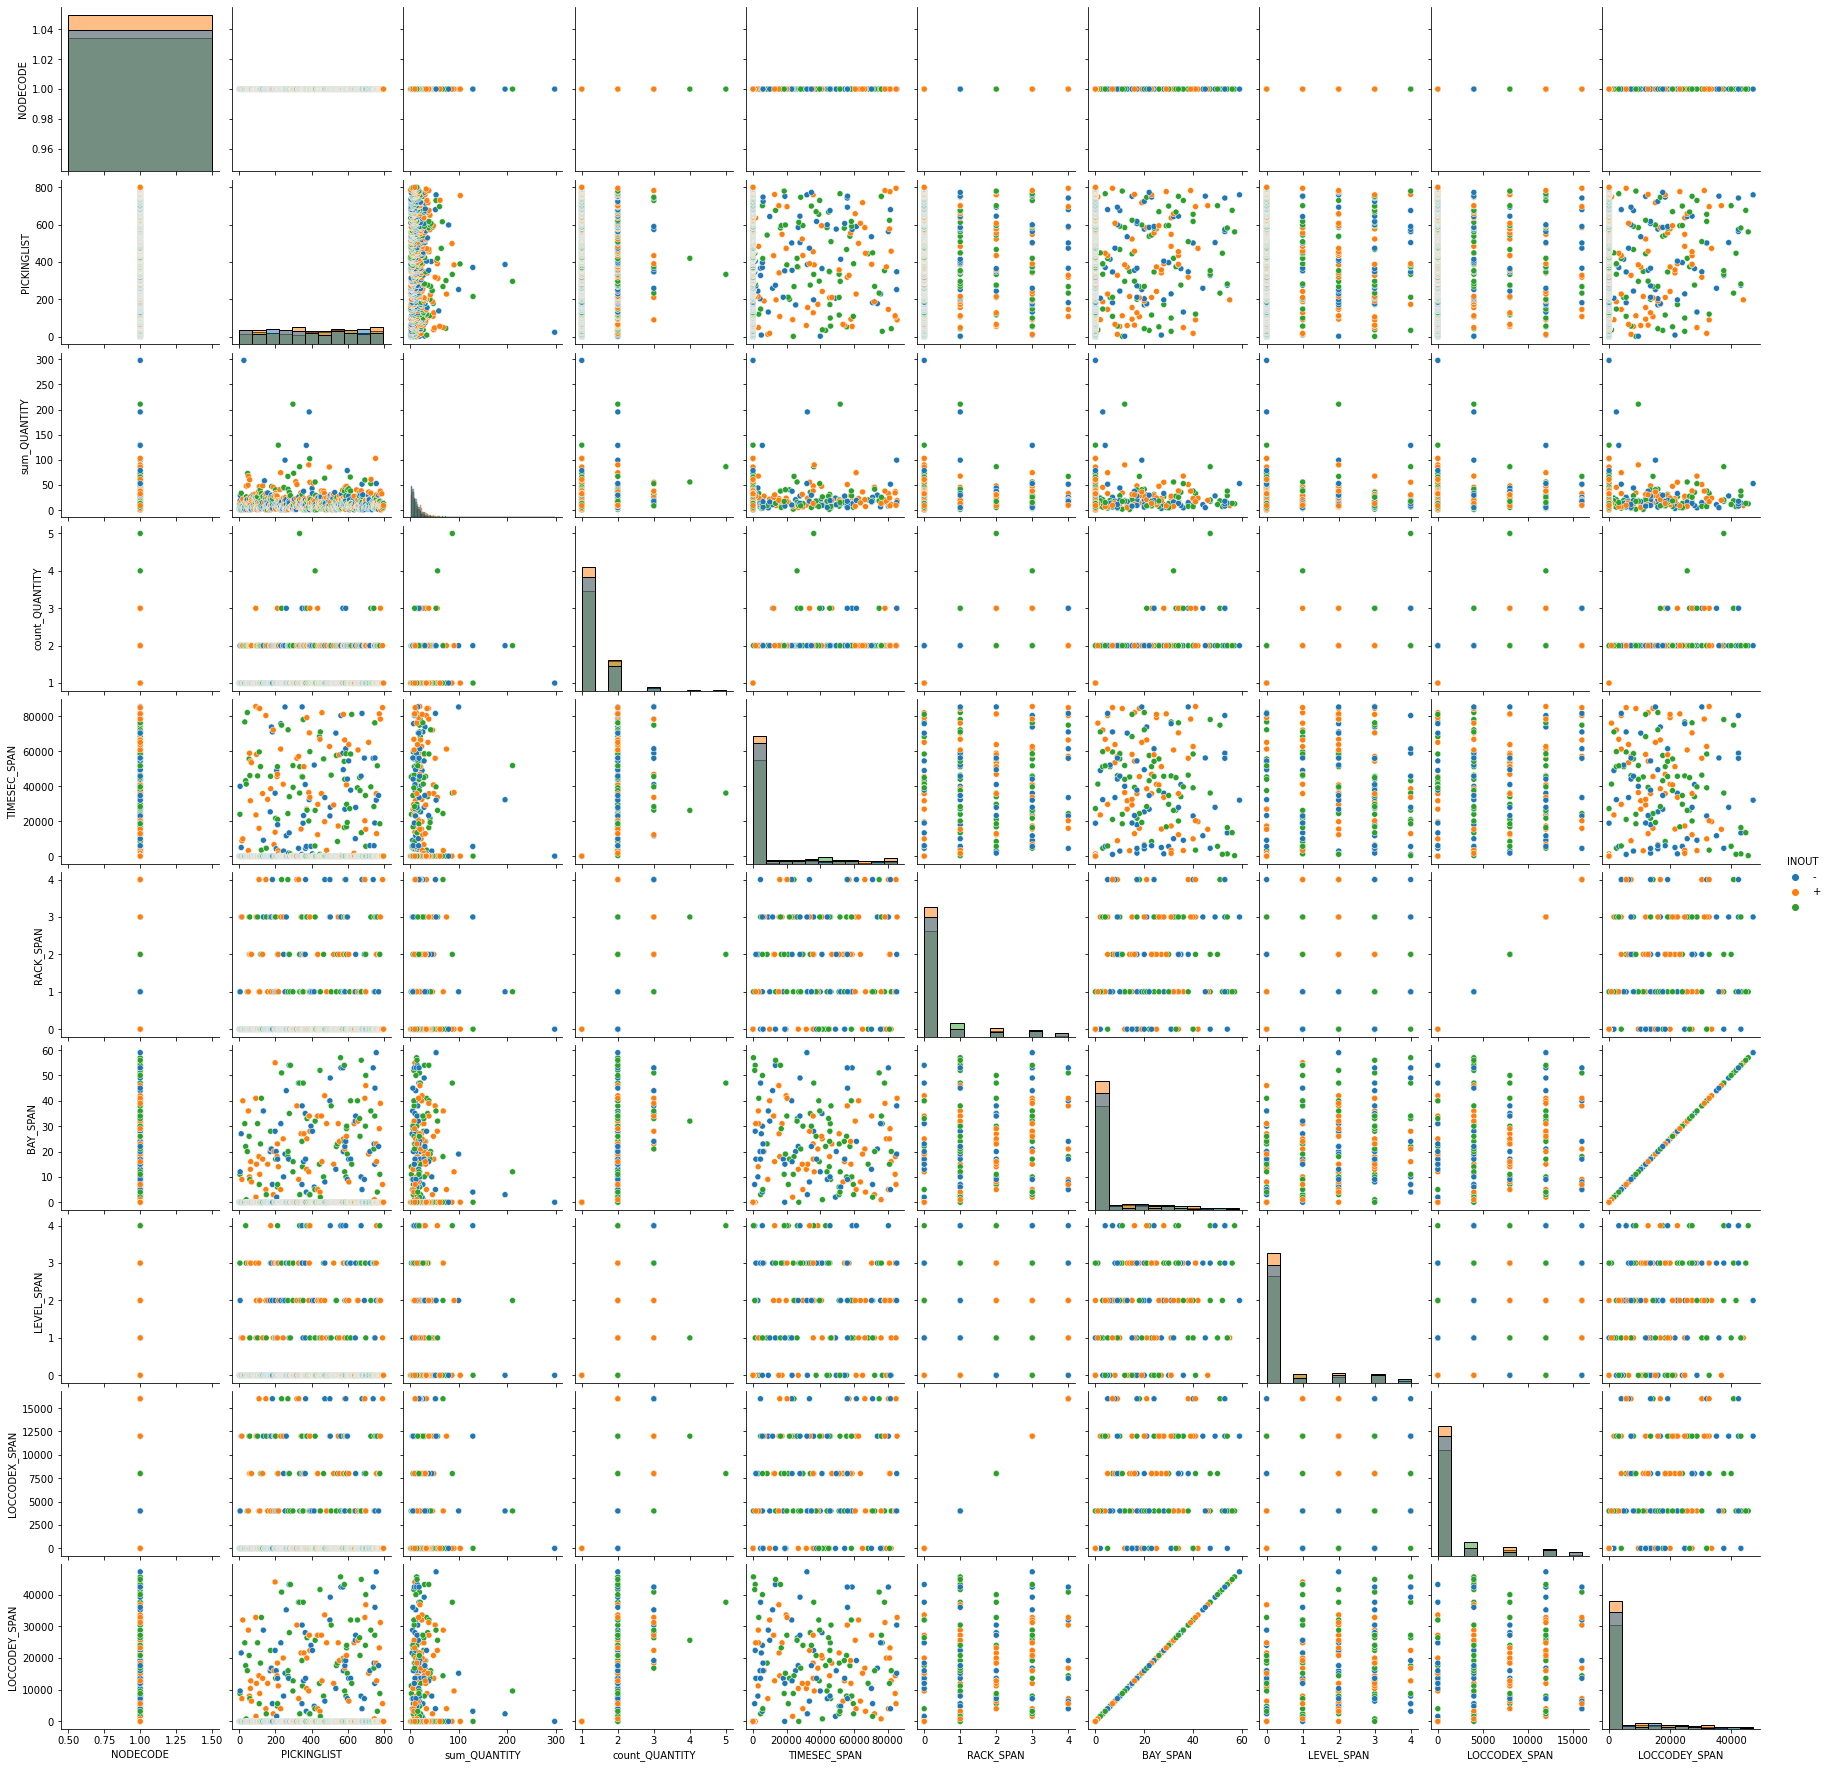

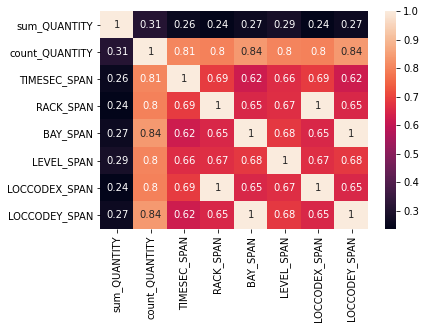

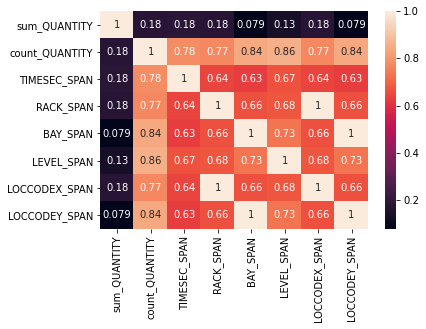

In [12]:
from analogistics.supply_chain.P8_performance_assessment.wh_explore_metrics import exploreKeyVars
output_figures = exploreKeyVars(D_learning)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 